# Count RCM acquisitions
Example of downloading historical RCM acquisition data from canada.ca

In [16]:
import sys
!{sys.executable} -m pip install httpx pandas beautifulsoup4


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


## Import dependencies

In [43]:
import httpx
import pandas as pd
import geopandas as gpd
from shapely import wkt
from bs4 import BeautifulSoup

## Url to fetch csv files

In [8]:
ftp_url = "https://ftp.maps.canada.ca/pub/csa_asc/Space-technology_Technologie-spatiale/radarsat_constellation_mission_plan/Archives/CSV/"

## Download RCM acquisition csv file locations

In [9]:
with httpx.Client(timeout=10) as client:
    response = client.get(ftp_url)
    response.raise_for_status()

In [20]:
soup = BeautifulSoup(response.read())
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">

<html>
<head>
<title>Index of /pub/csa_asc/Space-technology_Technologie-spatiale/radarsat_constellation_mission_plan/Archives/CSV</title>
</head>
<body>
<h1>Index of /pub/csa_asc/Space-technology_Technologie-spatiale/radarsat_constellation_mission_plan/Archives/CSV</h1>
<table>
<tr><th valign="top"><img alt="[ICO]" src="/icons/blank.gif"/></th><th><a href="?C=N;O=D">Name</a></th><th><a href="?C=M;O=A">Last modified</a></th><th><a href="?C=S;O=A">Size</a></th><th><a href="?C=D;O=A">Description</a></th></tr>
<tr><th colspan="5"><hr/></th></tr>
<tr><td valign="top"><img alt="[PARENTDIR]" src="/icons/back.gif"/></td><td><a href="/pub/csa_asc/Space-technology_Technologie-spatiale/radarsat_constellation_mission_plan/Archives/">Parent Directory</a> </td><td> </td><td align="right">  - </td><td> </td></tr>
<tr><td valign="top"><img alt="[TXT]" src="/icons/text.gif"/></td><td><a href="2021-11_radarsat_constellation_mission.csv">2021-11_ra

## These are the available csv files

In [98]:
hrefs = [item["href"] for item in soup.find_all("a", href=True) if item["href"].endswith(".csv")]
print(f"There are {len(hrefs)} acquisition datasets available.")
hrefs

There are 15 acquisition datasets available.


['2021-11_radarsat_constellation_mission.csv',
 '2021-12_radarsat_constellation_mission.csv',
 '2022-01_radarsat_constellation_mission.csv',
 '2022-02_radarsat_constellation_mission.csv',
 '2022-03_radarsat_constellation_mission.csv',
 '2022-04_radarsat_constellation_mission.csv',
 '2022-05_radarsat_constellation_mission.csv',
 '2022-06_radarsat_constellation_mission.csv',
 '2022-07_radarsat_constellation_mission.csv',
 '2022-08_radarsat_constellation_mission.csv',
 '2022-09_radarsat_constellation_mission.csv',
 '2022-10_radarsat_constellation_mission.csv',
 '2022-11_radarsat_constellation_mission.csv',
 '2022-12_radarsat_constellation_mission.csv',
 '2023-01_radarsat_constellation_mission.csv']

## Explore a single dataset
Let's explore a single dataset. Here we create the url for the first dataset and read it into a Pandas DataFrame. Pandas is a core library for wxploring tabular data in the Python data science community.

In [37]:
href_url = f"{ftp_url}{href}"
href_url

'https://ftp.maps.canada.ca/pub/csa_asc/Space-technology_Technologie-spatiale/radarsat_constellation_mission_plan/Archives/CSV/2021-11_radarsat_constellation_mission.csv'

## Pandas can read directly from a url

In [40]:
df = pd.read_csv(href_url)
df

,SATID,BEAMTYPE_EN,BEAMTYPE_FR,BEAMID,POLTYPE_EN,POLTYPE_FR,TXPOL,RXPOL,CCD_EN,CCD_FR,EXACTCCD_EN,EXACTCCD_FR,UTC_STRT,UTC_END,PRODTYPE_EN,PRODTYPE_FR,BAQ,RADARMD,WKT
0,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-26T03:20:23,2021-11-26T03:21:03,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((23.16394 70.34542,23.15421 70...."
1,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-24T03:05:29,2021-11-24T03:05:34,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((21.68232 74.49756,21.59794 74...."
2,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-23T02:12:11,2021-11-23T02:15:01,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((83.57274 76.85409,83.45535 76...."
3,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-17T06:08:03,2021-11-17T06:08:58,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((143.62843 79.51335,143.52666 7..."
4,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-11T02:13:26,2021-11-11T02:13:34,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((76.08469 72.62348,76.02182 72...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18029,RCM-3,Spotlight,Spotlight,FSL15,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-25T10:04:50,2021-11-25T10:04:53,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"MULTIPOLYGON (((-64.95985 48.16157,-64.96831 4..."
18030,RCM-3,Spotlight,Spotlight,FSL23,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-23T11:23:49,2021-11-23T11:23:52,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-82.48094 42.92654,-82.48366 4..."
18031,RCM-3,Spotlight,Spotlight,FSL25,Single Polarization,Polarisation simple,H,H,False,FAUX,False,FAUX,2021-11-10T10:47:30,2021-11-10T10:47:33,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"MULTIPOLYGON (((-69.40456 48.28339,-69.40761 4..."
18032,RCM-3,Spotlight,Spotlight,FSL23,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-11T11:23:49,2021-11-11T11:23:52,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-82.48094 42.92654,-82.48281 4..."


## Convert to a Geopandas GeoDataFrame
A Geopandas GeoDataFrame is a Pandas DataFrame, but with a geometry column. The geometry column allows to do spatial things, like intersects, contains, envelopes, etc.

In [44]:
df['geometry'] = df.WKT.apply(wkt.loads)
df.drop('WKT', axis=1, inplace=True)
df

/home/jhetzel/.cache/pypoetry/virtualenvs/notebooks-jou60wtj-py3.10/lib/python3.10/site-packages/pandas/core/dtypes/inference.py:387: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/home/jhetzel/.cache/pypoetry/virtualenvs/notebooks-jou60wtj-py3.10/lib/python3.10/site-packages/pandas/core/dtypes/inference.py:388: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/home/jhetzel/.cache/pypoetry/virtualenvs/notebooks-jou60wtj-py3.10/lib/python3.10/site-packages/pandas/io/formats/printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shape

,SATID,BEAMTYPE_EN,BEAMTYPE_FR,BEAMID,POLTYPE_EN,POLTYPE_FR,TXPOL,RXPOL,CCD_EN,CCD_FR,EXACTCCD_EN,EXACTCCD_FR,UTC_STRT,UTC_END,PRODTYPE_EN,PRODTYPE_FR,BAQ,RADARMD,geometry
0,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-26T03:20:23,2021-11-26T03:21:03,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"(POLYGON ((23.16394 70.34542, 23.15421 70.3538..."
1,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-24T03:05:29,2021-11-24T03:05:34,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"(POLYGON ((21.68232 74.49756, 21.59794 74.5477..."
2,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-23T02:12:11,2021-11-23T02:15:01,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"(POLYGON ((83.57274 76.85409, 83.45535 76.8042..."
3,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-17T06:08:03,2021-11-17T06:08:58,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"(POLYGON ((143.62843 79.51335, 143.52666 79.53..."
4,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-11T02:13:26,2021-11-11T02:13:34,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"(POLYGON ((76.08469 72.62348, 76.02182 72.5763..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18029,RCM-3,Spotlight,Spotlight,FSL15,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-25T10:04:50,2021-11-25T10:04:53,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"(POLYGON ((-64.95985 48.16157, -64.96831 48.19..."
18030,RCM-3,Spotlight,Spotlight,FSL23,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-23T11:23:49,2021-11-23T11:23:52,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"(POLYGON ((-82.48094 42.92654, -82.48366 42.93..."
18031,RCM-3,Spotlight,Spotlight,FSL25,Single Polarization,Polarisation simple,H,H,False,FAUX,False,FAUX,2021-11-10T10:47:30,2021-11-10T10:47:33,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"(POLYGON ((-69.40456 48.28339, -69.40761 48.27..."
18032,RCM-3,Spotlight,Spotlight,FSL23,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-11T11:23:49,2021-11-11T11:23:52,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"(POLYGON ((-82.48094 42.92654, -82.48281 42.93..."


## Here is the GeoDataFrame

In [45]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf

,SATID,BEAMTYPE_EN,BEAMTYPE_FR,BEAMID,POLTYPE_EN,POLTYPE_FR,TXPOL,RXPOL,CCD_EN,CCD_FR,EXACTCCD_EN,EXACTCCD_FR,UTC_STRT,UTC_END,PRODTYPE_EN,PRODTYPE_FR,BAQ,RADARMD,geometry
0,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-26T03:20:23,2021-11-26T03:21:03,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((23.16394 70.34542, 23.15421 70..."
1,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-24T03:05:29,2021-11-24T03:05:34,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((21.68232 74.49756, 21.59794 74..."
2,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-23T02:12:11,2021-11-23T02:15:01,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((83.57274 76.85409, 83.45535 76..."
3,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-17T06:08:03,2021-11-17T06:08:58,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((143.62843 79.51335, 143.52666 ..."
4,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-11T02:13:26,2021-11-11T02:13:34,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((76.08469 72.62348, 76.02182 72..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18029,RCM-3,Spotlight,Spotlight,FSL15,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-25T10:04:50,2021-11-25T10:04:53,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"MULTIPOLYGON (((-64.95985 48.16157, -64.96831 ..."
18030,RCM-3,Spotlight,Spotlight,FSL23,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-23T11:23:49,2021-11-23T11:23:52,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-82.48094 42.92654, -82.48366 ..."
18031,RCM-3,Spotlight,Spotlight,FSL25,Single Polarization,Polarisation simple,H,H,False,FAUX,False,FAUX,2021-11-10T10:47:30,2021-11-10T10:47:33,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"MULTIPOLYGON (((-69.40456 48.28339, -69.40761 ..."
18032,RCM-3,Spotlight,Spotlight,FSL23,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-11T11:23:49,2021-11-11T11:23:52,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-82.48094 42.92654, -82.48281 ..."


## Geometry of Canada
We want to filter only RCM aquisitions that intersect with Canada. As an approximation, we can use the `natrualearth_lowres` dataset included in GeoPandas.

In [48]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [66]:
gdf_canada = world[world["name"] == "Canada"]
gdf_canada

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."


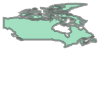

In [67]:
canada = gdf_canada.geometry.iloc[0]
canada

## Filter by intersection with Canada

In [69]:
rcm_canada = gdf[gdf.intersects(canada)]
rcm_canada

,SATID,BEAMTYPE_EN,BEAMTYPE_FR,BEAMID,POLTYPE_EN,POLTYPE_FR,TXPOL,RXPOL,CCD_EN,CCD_FR,EXACTCCD_EN,EXACTCCD_FR,UTC_STRT,UTC_END,PRODTYPE_EN,PRODTYPE_FR,BAQ,RADARMD,geometry
30,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-20T02:40:47,2021-11-20T02:41:04,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-106.57217 75.38140, -106.6635..."
87,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-26T01:50:23,2021-11-26T01:50:52,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-70.00110 81.90847, -70.02703 ..."
97,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-26T01:53:35,2021-11-26T01:53:52,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-100.03058 71.72916, -100.0369..."
116,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-02T01:49:54,2021-11-02T01:50:43,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-58.34488 83.02582, -58.60653 ..."
128,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-26T12:13:56,2021-11-26T12:14:13,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-47.49747 81.69611, -47.58899 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18029,RCM-3,Spotlight,Spotlight,FSL15,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-25T10:04:50,2021-11-25T10:04:53,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"MULTIPOLYGON (((-64.95985 48.16157, -64.96831 ..."
18030,RCM-3,Spotlight,Spotlight,FSL23,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-23T11:23:49,2021-11-23T11:23:52,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-82.48094 42.92654, -82.48366 ..."
18031,RCM-3,Spotlight,Spotlight,FSL25,Single Polarization,Polarisation simple,H,H,False,FAUX,False,FAUX,2021-11-10T10:47:30,2021-11-10T10:47:33,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"MULTIPOLYGON (((-69.40456 48.28339, -69.40761 ..."
18032,RCM-3,Spotlight,Spotlight,FSL23,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-11T11:23:49,2021-11-11T11:23:52,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-82.48094 42.92654, -82.48281 ..."


## Total number of RCM acquisitions

In [71]:
len(rcm_canada)

8479

## Counts by satellite ID

In [100]:
rcm_canada["SATID"].value_counts()

RCM-3    2853
RCM-2    2823
RCM-1    2803
Name: SATID, dtype: int64

## Counts by radar mode

In [101]:
rcm_canada["RADARMD"].value_counts()

ScanSAR                7693
Stripmap Continuous     736
Spotlight                46
Stripmap Burst            4
Name: RADARMD, dtype: int64

## List of columns to summarize

In [79]:
summarize_columns = ['SATID', 'BEAMTYPE_EN', 'BEAMID', 'POLTYPE_EN', 'TXPOL', 'RXPOL', 'CCD_EN', 'EXACTCCD_EN', 'PRODTYPE_EN', 'BAQ', 'RADARMD']
summarize_columns

['SATID',
 'BEAMTYPE_EN',
 'BEAMID',
 'POLTYPE_EN',
 'TXPOL',
 'RXPOL',
 'CCD_EN',
 'EXACTCCD_EN',
 'PRODTYPE_EN',
 'BAQ',
 'RADARMD']

## Counts of all columns to summarize

In [88]:
for column in summarize_columns:
    print(column)
    print(rcm_canada[column].value_counts())
    print()

SATID
RCM-3    2853
RCM-2    2823
RCM-1    2803
Name: SATID, dtype: int64

BEAMTYPE_EN
Medium Resolution 50m      4811
Medium Resolution 30m      1631
Low Noise                  1196
Very High Resolution 3m     276
High Resolution 5m          240
Medium Resolution 16m       199
Low Resolution 100m          55
Spotlight                    46
Quad-Polarization            25
Name: BEAMTYPE_EN, dtype: int64

BEAMID
SC50MB      3380
SC50MC       760
SCLNB        702
SC50MA       661
SC30MCPD     407
            ... 
QP23           1
5M7            1
5M16           1
QP12           1
5M15           1
Name: BEAMID, Length: 145, dtype: int64

POLTYPE_EN
Dual Co/Cross Polarization    6384
Compact Polarization          1714
Single Polarization            352
Quad Polarization               25
Dual HH-VV Polarization          4
Name: POLTYPE_EN, dtype: int64

TXPOL
H      6199
C      1714
V       537
H+V      29
Name: TXPOL, dtype: int64

RXPOL
H+V    8127
H       352
Name: RXPOL, dtype: int64

C

## Now, let's download all data frames from 2022

In [106]:
hrefs_2022 = [href for href in hrefs if href.startswith("2022")]
hrefs_2022

['2022-01_radarsat_constellation_mission.csv',
 '2022-02_radarsat_constellation_mission.csv',
 '2022-03_radarsat_constellation_mission.csv',
 '2022-04_radarsat_constellation_mission.csv',
 '2022-05_radarsat_constellation_mission.csv',
 '2022-06_radarsat_constellation_mission.csv',
 '2022-07_radarsat_constellation_mission.csv',
 '2022-08_radarsat_constellation_mission.csv',
 '2022-09_radarsat_constellation_mission.csv',
 '2022-10_radarsat_constellation_mission.csv',
 '2022-11_radarsat_constellation_mission.csv',
 '2022-12_radarsat_constellation_mission.csv']

In [112]:
data_frames = [pd.read_csv(f"{ftp_url}{href}") for href in hrefs_2022]

## Concatenate into a single DataFrame

In [108]:
data_frame = pd.concat(data_frames, ignore_index=True)
data_frame

,SATID,BEAMTYPE_EN,BEAMTYPE_FR,BEAMID,POLTYPE_EN,POLTYPE_FR,TXPOL,RXPOL,CCD_EN,CCD_FR,EXACTCCD_EN,EXACTCCD_FR,UTC_STRT,UTC_END,PRODTYPE_EN,PRODTYPE_FR,BAQ,RADARMD,WKT
0,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-07T14:32:27,2022-01-07T14:33:32,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON(((33.76464 71.65086,33.75449 71.6..."
1,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-07T06:34:15,2022-01-07T06:34:35,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON(((88.77929 83.95602,88.2853 83.96..."
2,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-01T12:17:04,2022-01-01T12:17:38,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON(((-76.0494 71.60009,-76.08724 71...."
3,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-07T01:39:04,2022-01-07T01:44:41,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON(((-129.26334 67.77868,-129.28291 ..."
4,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-25T17:10:57,2022-01-25T17:12:21,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON(((-159.13989 56.1851,-159.15201 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203997,RCM-3,Spotlight,Spotlight,FSLCP10,Compact Polarization,Polarisation compacte,C,H+V,True,VRAI,False,FAUX,2022-12-23T00:52:51,2022-12-23T00:52:54,SLC - 32bit,SLC - 32bits,2 bit,Spotlight,"MULTIPOLYGON(((-120.34514 73.62836,-120.38282 ..."
203998,RCM-3,Spotlight,Spotlight,FSL6,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2022-12-19T22:44:14,2022-12-19T22:44:17,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON(((-75.49371 44.71055,-75.49496 44..."
203999,RCM-3,Spotlight,Spotlight,FSL20,Single Polarization,Polarisation simple,H,H,False,FAUX,False,FAUX,2022-12-17T10:58:13,2022-12-17T10:58:16,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"MULTIPOLYGON(((110.40729 -7.5458,110.40451 -7...."
204000,RCM-3,Spotlight,Spotlight,FSL24,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2022-12-06T22:36:41,2022-12-06T22:36:45,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON(((-71.18898 46.89148,-71.20061 46..."


## Convert to a single GeoDataFrame

In [109]:
data_frame['geometry'] = data_frame.WKT.apply(wkt.loads)
data_frame.drop('WKT', axis=1, inplace=True)
geo_data_frame = gpd.GeoDataFrame(data_frame, geometry='geometry')
geo_data_frame

,SATID,BEAMTYPE_EN,BEAMTYPE_FR,BEAMID,POLTYPE_EN,POLTYPE_FR,TXPOL,RXPOL,CCD_EN,CCD_FR,EXACTCCD_EN,EXACTCCD_FR,UTC_STRT,UTC_END,PRODTYPE_EN,PRODTYPE_FR,BAQ,RADARMD,geometry
0,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-07T14:32:27,2022-01-07T14:33:32,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((33.76464 71.65086, 33.75449 71..."
1,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-07T06:34:15,2022-01-07T06:34:35,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((88.77929 83.95602, 88.28530 83..."
2,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-01T12:17:04,2022-01-01T12:17:38,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-76.04940 71.60009, -76.08724 ..."
3,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-07T01:39:04,2022-01-07T01:44:41,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-129.26334 67.77868, -129.2829..."
4,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-25T17:10:57,2022-01-25T17:12:21,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-159.13989 56.18510, -159.1520..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203997,RCM-3,Spotlight,Spotlight,FSLCP10,Compact Polarization,Polarisation compacte,C,H+V,True,VRAI,False,FAUX,2022-12-23T00:52:51,2022-12-23T00:52:54,SLC - 32bit,SLC - 32bits,2 bit,Spotlight,"MULTIPOLYGON (((-120.34514 73.62836, -120.3828..."
203998,RCM-3,Spotlight,Spotlight,FSL6,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2022-12-19T22:44:14,2022-12-19T22:44:17,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-75.49371 44.71055, -75.49496 ..."
203999,RCM-3,Spotlight,Spotlight,FSL20,Single Polarization,Polarisation simple,H,H,False,FAUX,False,FAUX,2022-12-17T10:58:13,2022-12-17T10:58:16,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"MULTIPOLYGON (((110.40729 -7.54580, 110.40451 ..."
204000,RCM-3,Spotlight,Spotlight,FSL24,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2022-12-06T22:36:41,2022-12-06T22:36:45,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-71.18898 46.89148, -71.20061 ..."


## Intersect with Canada

In [110]:
geo_data_frame_canada = geo_data_frame[geo_data_frame.intersects(canada)]
geo_data_frame_canada

,SATID,BEAMTYPE_EN,BEAMTYPE_FR,BEAMID,POLTYPE_EN,POLTYPE_FR,TXPOL,RXPOL,CCD_EN,CCD_FR,EXACTCCD_EN,EXACTCCD_FR,UTC_STRT,UTC_END,PRODTYPE_EN,PRODTYPE_FR,BAQ,RADARMD,geometry
2,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-01T12:17:04,2022-01-01T12:17:38,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-76.04940 71.60009, -76.08724 ..."
3,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-07T01:39:04,2022-01-07T01:44:41,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-129.26334 67.77868, -129.2829..."
6,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-31T16:16:17,2022-01-31T16:19:08,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-122.72637 78.60944, -122.8875..."
16,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-19T13:03:06,2022-01-19T13:06:41,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-73.15615 78.99974, -73.22956 ..."
25,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-11T23:02:39,2022-01-11T23:04:11,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-83.65267 54.89103, -83.65395 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203996,RCM-3,Spotlight,Spotlight,FSL24,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2022-12-13T12:39:47,2022-12-13T12:39:51,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-97.01166 49.79291, -97.02300 ..."
203997,RCM-3,Spotlight,Spotlight,FSLCP10,Compact Polarization,Polarisation compacte,C,H+V,True,VRAI,False,FAUX,2022-12-23T00:52:51,2022-12-23T00:52:54,SLC - 32bit,SLC - 32bits,2 bit,Spotlight,"MULTIPOLYGON (((-120.34514 73.62836, -120.3828..."
203998,RCM-3,Spotlight,Spotlight,FSL6,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2022-12-19T22:44:14,2022-12-19T22:44:17,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-75.49371 44.71055, -75.49496 ..."
204000,RCM-3,Spotlight,Spotlight,FSL24,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2022-12-06T22:36:41,2022-12-06T22:36:45,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-71.18898 46.89148, -71.20061 ..."


## Summary statistics

In [111]:
for column in summarize_columns:
    print(column)
    print(geo_data_frame_canada[column].value_counts())
    print()

SATID
RCM-1    32565
RCM-2    32323
RCM-3    32191
Name: SATID, dtype: int64

BEAMTYPE_EN
Low Noise                  31159
Medium Resolution 30m      28818
Medium Resolution 50m      21445
Medium Resolution 16m       4391
High Resolution 5m          4194
Very High Resolution 3m     3468
Low Resolution 100m         1684
Spotlight                   1416
Quad-Polarization            500
Ship Detection                 4
Name: BEAMTYPE_EN, dtype: int64

BEAMID
SCLNB          22216
SC50MB          8819
SC50MA          8684
SC30MCPA        7692
SC30MCPD        7197
               ...  
3MCP16             1
FSLCP9             1
3MCP25             1
SC50MHIPRFB        1
5M4                1
Name: BEAMID, Length: 235, dtype: int64

POLTYPE_EN
Dual Co/Cross Polarization    60974
Compact Polarization          31163
Single Polarization            4440
Quad Polarization               500
Dual HH-VV Polarization           2
Name: POLTYPE_EN, dtype: int64

TXPOL
H      58703
C      31163
V       6711


In [113]:
type(canada)

shapely.geometry.multipolygon.MultiPolygon

In [117]:
import json

with open("canada.geojson", "w") as sink:
    sink.write(json.dumps(canada.__geo_interface__))